## Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import torch
torch.__version__

'2.0.1+cu118'

In [3]:
import torch.nn as nn

## Base de dados

In [4]:
np.random.seed(123)
torch.manual_seed(123)
#para fins de estudos, vamos manter a mesma seed do curso

carregando a base de dados

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
X = pd.read_csv("/content/drive/MyDrive/Bases/entradas_breast.csv")
X.head(10)
#569 linhas, 30 variaveis

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,109.00000,0.11270,74.00000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,235.0000,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,539.0000,206.0000,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,203.0000,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1058.0000,1105.0000,221.0000,0.4366,0.20750


In [7]:
Y = pd.read_csv("/content/drive/MyDrive/Bases/saidas_breast.csv")
Y.tail(10)

,0
559,1
560,1
561,1
562,0
563,0
564,0
565,0
566,0
567,0
568,1


<Axes: xlabel='0', ylabel='count'>

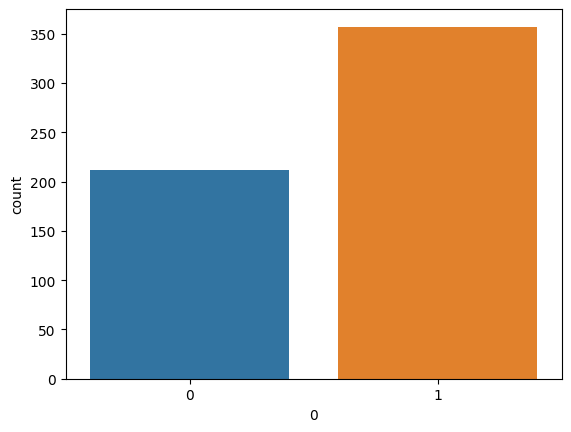

In [8]:
sns.countplot(x=Y['0'])

divisão entre treinamento e teste

In [9]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.25)

In [10]:
X_treino.shape

(426, 30)

In [11]:
X_teste.shape

(143, 30)

## Transformação dos dados para tensores
para se adaptar à rede neural, tensores são arrays muito parecidos com o do numpy, mas tem características únicas para uso em redes neurais

In [12]:
type(X_treino)

pandas.core.frame.DataFrame

In [13]:
X_treino = np.array(X_treino)
Y_treino = np.array(Y_treino)

In [14]:
X_treino = torch.tensor(X_treino, dtype=torch.float)
Y_treino = torch.tensor(Y_treino, dtype=torch.float)
type(X_treino)

torch.Tensor

precisamos unir essas 2 variáveis para que ela vire um dataset completo

In [15]:
dataset = torch.utils.data.TensorDataset(X_treino, Y_treino)

In [16]:
type(dataset)

torch.utils.data.dataset.TensorDataset

o pytorch faz o treinamento do tipo mini batches, onde devemos oferecer o dataloader<br>
devemos fornecer-lo para que ele faça as iterações, assim o pytorch calcula o erro a cada batch e atualiza os pesos por batches, o dataloader garante que o ajuste dos pesos seja feito de 10 em 10 registros

In [17]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

## Construção do modelo
- camada de entrada -> neuronios = qtd de atributos previsores, nesse caso 30
- primeira camada oculta -> neuronios = 16 (seguindo a regra de quantidade de neuronios na camada oculta sendo (entrada+saida)/2)
- segunda camada oculta -> neuronios = 16 (seguindo a regra de quantidade)
- camada de saída -> neuronios=1, quanto mais próximo de 1 ele tem o cancer maligno, quanto mais próximo de 0 ele tem o cancer benigno

In [18]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, outfeatures=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

SyntaxError: ignored

- `Linear` = camada densa
- `in_features` = neuronios de entrada, tambem devemos informar esse parametro nas camadas ocultas, avisando quantos neuronios tem na camada anterior
- `out_features` = neuronios de saida
- `ReLU` = aplica a função relu na camada acima
- `Sigmoid` = aplica a função sigmoid na camada acima

In [ ]:
classificador.parameters